## Final Project INFO 3401 Information Exploration¶

### Perform Explortatory Data Analysis (EDA)
### We covered these topics in Week 4 (Canvas)
### Also see Chapter 4 of the The Art of Data Science

#### Step 0: Load libraries

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Here I loaded the libraries so, that I am able to use them later on. 

#### Step 1: Formulate a question

Question: What are the top 2 cause of heart disease based on your EDA of Cleveland Heart Disease dataset? 

#### Step 2: Read in the data

In [67]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


I read in the data set using the pandas read.csv function

#### Step 3: Check the packaging

In [68]:
df.shape

(303, 14)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [70]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Step 4: Look at the top and bottom of the data

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


#### Step 5: ABC: Always be Checking your "n"s and Clean the Data

There are 303 observations

##### Clean Data 5.1 Are there NULL values in the data?

In [55]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the data set

##### Clean Data 5.2 Are there any duplicate values in the data?

In [56]:
df.duplicated().sum()

1

There is one duplicate in the dataset.

In [73]:
df = df.drop_duplicates()

In [74]:
df.duplicated().sum()

0

I removed the duplicate using the drop duplicates function.

##### Clean Data 5.3 Are there any outliers in the data?

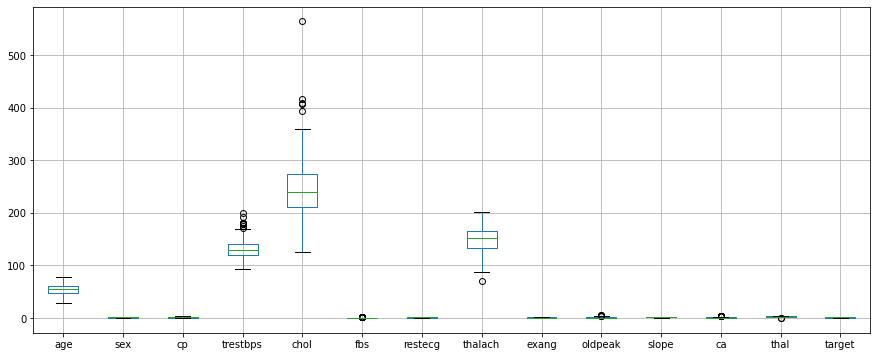

In [59]:
import matplotlib.pyplot as plt
df.boxplot(figsize = (15,6))

The plot shows the duplicates in the dataset. 

In [60]:
# let's see how many outliers are in every column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

age          0
sex          0
cp           0
trestbps     9
chol         5
fbs         45
restecg      0
thalach      1
exang        0
oldpeak      5
slope        0
ca          24
thal         2
target       0
dtype: int64

In [61]:
continuousdf = pd.DataFrame(df , columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
continuousdf

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


In [62]:
# let's remove the outliers

outliers = ((continuousdf < (Q1 - 1.5 * IQR)) | (continuousdf > (Q3 + 1.5 * IQR)))

for col in continuousdf.columns:
    q1 = continuousdf[col].quantile(0.25)
    q3 = continuousdf[col].quantile(0.75)
    iqr = q3 - q1
    continuousdf.loc[(continuousdf[col] < (q1 - 1.5 * iqr)), col] = (q1 - 1.5 * iqr)
    continuousdf.loc[(continuousdf[col] > (q3 + 1.5 * iqr)), col] = (q3 + 1.5 * iqr)

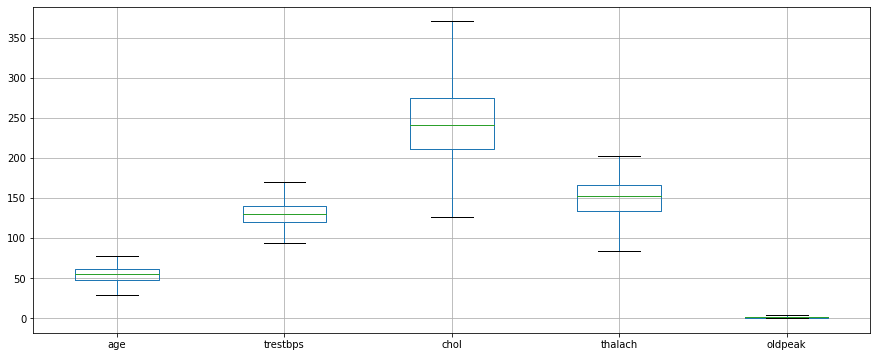

In [75]:
# let's see how the box plot looks like after the removal of outliers

continuousdf.boxplot(figsize = (15,6))

##### Clean Data 5.4 Are there any zero values in the data that don't make sense?

In [76]:
cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for col in cols:
    print(f"Number of zeros for column {col} is: {(df[col]==0).sum()}")

Number of zeros for column age is: 0
Number of zeros for column trestbps is: 0
Number of zeros for column chol is: 0
Number of zeros for column thalach is: 0
Number of zeros for column oldpeak is: 98


Oldpeak is the only continuous variable with zeros.

In [77]:
# let's replace zeros with median values

for col in cols:
    col_median = continuousdf[col].median()
    df.loc[df[col] == 0, col] = col_median

/Users/juliafoley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [78]:
cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
for col in cols:
    print(f"Number of zeros for column {col} is: {(df[col]==0).sum()}")

Number of zeros for column age is: 0
Number of zeros for column trestbps is: 0
Number of zeros for column chol is: 0
Number of zeros for column thalach is: 0
Number of zeros for column oldpeak is: 0


I removed the zeros of the continuous variables.

#### Step 6: Validate the data against another source

The source can be validated from two other sources: 
    
    a) Dr. Shah gave us the dataset and he is a reliable source 
    b) The dataset originated from the Cleveland Heart Clinic

#### Step 7: Make plots

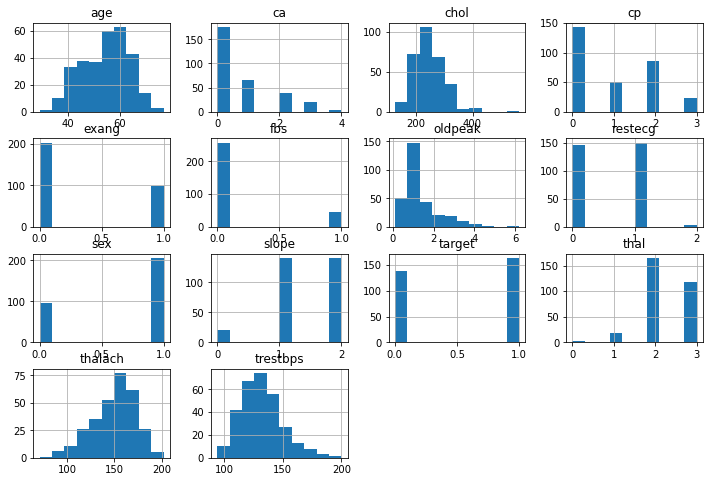

In [79]:
# Lets plot the histogram chart for the independent and dependent variables

df.hist(figsize = (12, 8));

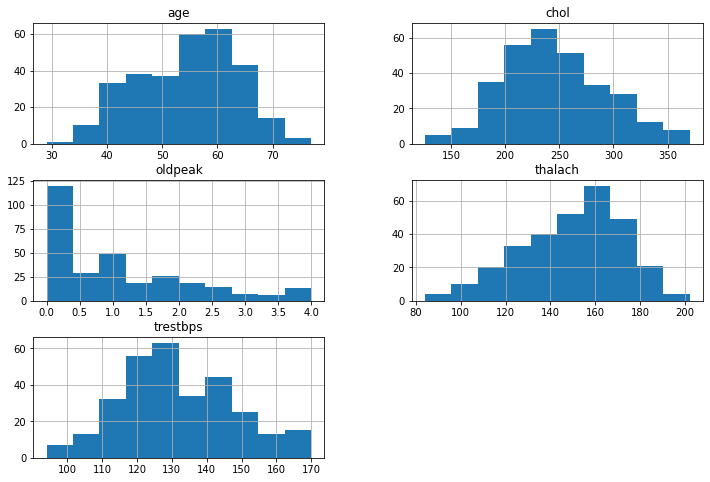

In [80]:
# Lets plot the histogram chart for the independent and dependent variables

continuousdf.hist(figsize = (12, 8));

target
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

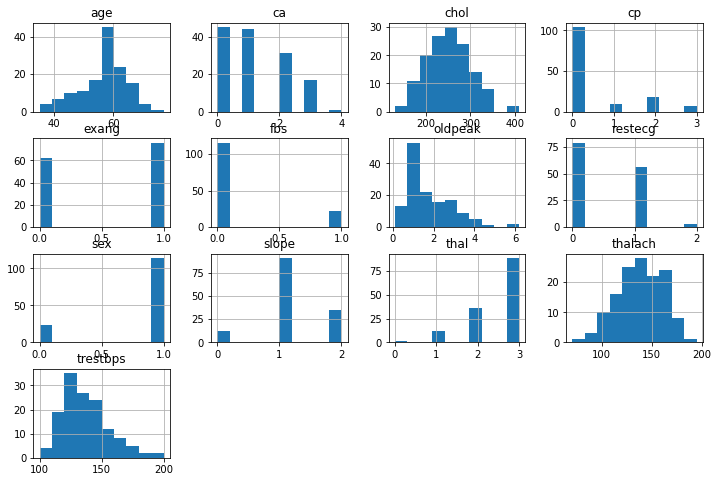

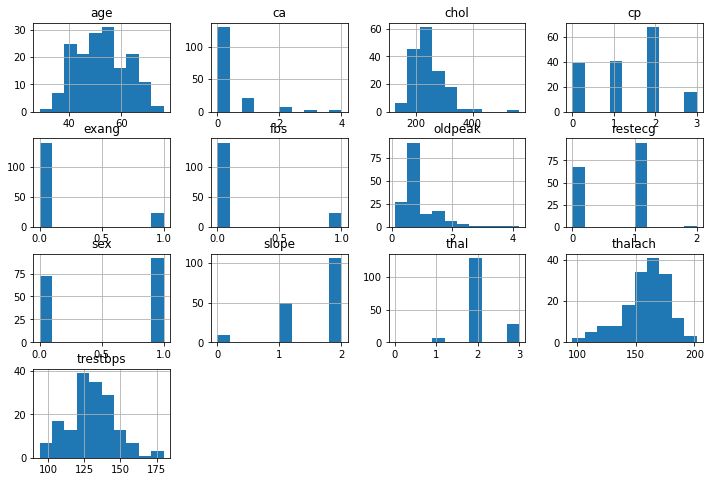

In [22]:
#group by outcome

df.groupby('target').hist(figsize = (12,8))

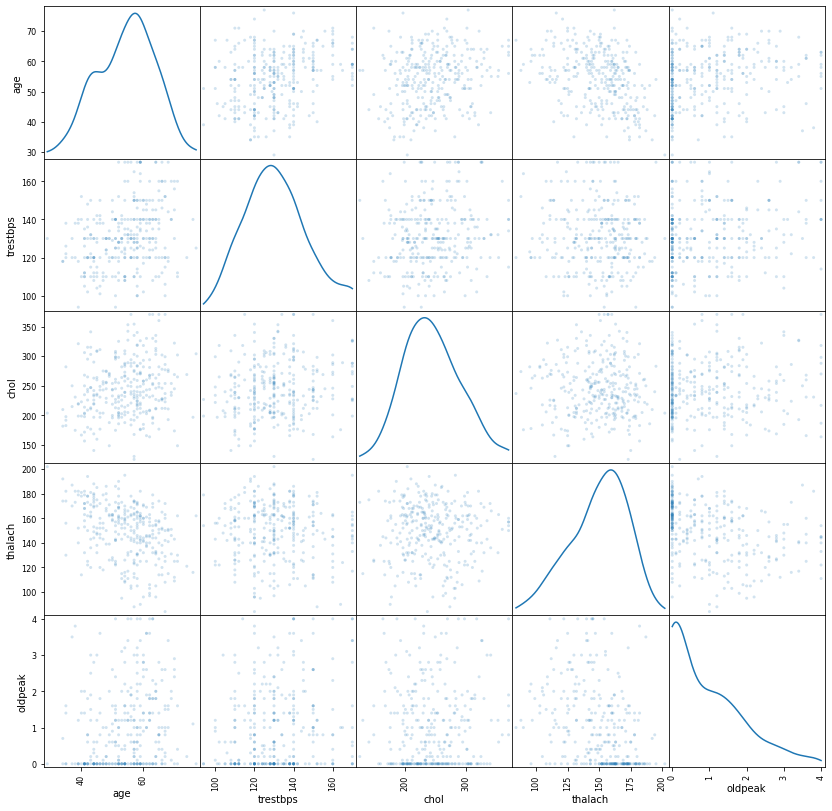

In [23]:
# look for correlation in a scatter plot

from pandas.plotting import scatter_matrix
scatter_matrix(continuousdf, alpha=0.2, figsize=(14, 14), diagonal='kde');

Here it looks like age has some correlation with chol, thalach, and trestbps but, it is hard to tell. 

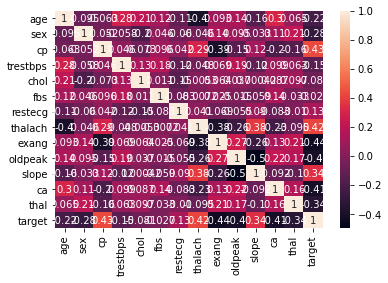

In [86]:
# But it is easier to see correlation with a heatmap

import seaborn as sns
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
In this heatmap, it shows that cp and target have the 

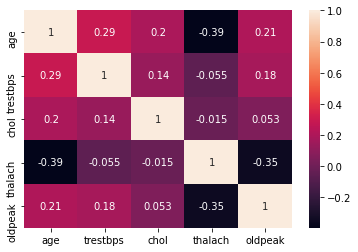

In [83]:
# But it is easier to see correlation with a heatmap

import seaborn as sns
sns.heatmap(continuousdf.corr(), annot = True)
plt.show()

From the heatmap, I am able to see that age and thalach have the largest negative correlation with a correlation of -.39. I looked at the correlation between the continuous variables because that is what we are calculating in the next part. 

#### Step 8: Try an easy solution

In [84]:
corr = df.corr()
corrSort = corr['target'].sort_values(ascending=False)
print(corrSort)

target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
oldpeak    -0.404048
ca         -0.408992
exang      -0.435601
Name: target, dtype: float64


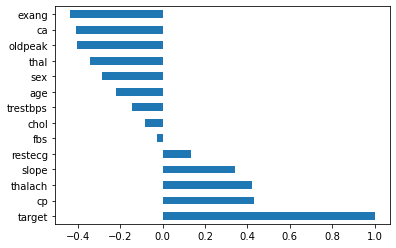

In [85]:
for row in corrSort:
    
    corrSort.plot.barh()

I found that target and exang have the largest negative correlation and the most correlation overall. Target and cp have the largest positive population.

### Perfrom Correlation Analysis on continuous variables of the Cleveland Heart Disease dataset and test your coorelation using Hypothesis Testing.
### We covered these topics in Week 9 (Canvas)

#### Step 0: The continuous variables are age, trestbps, chol, thalach and oldpeak

#### Step 1: Compute covariance between different continuous variables

In [38]:
x1 = df['age']
y1 = df['trestbps']
cov_mat = np.stack((x1,y1), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[ 81.86575653  44.99157334]
 [ 44.99157334 308.47281688]]


In [39]:
x2 = df['age']
y2 = df['chol']
cov_mat = np.stack((x2,y2), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[  81.86575653   97.03156146]
 [  97.03156146 2678.42358804]]


In [40]:
x3 = df['age']
y3 = df['thalach']
cov_mat = np.stack((x3,y3), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[ 81.86575653 -81.90475457]
 [-81.90475457 524.57156058]]


In [41]:
x4 = df['age']
y4 = df['oldpeak']
cov_mat = np.stack((x4,y4), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[81.86575653  1.24506171]
 [ 1.24506171  0.9463717 ]]


In [42]:
x5 = df['trestbps']
y5 = df['chol']
cov_mat = np.stack((x5,y5), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[ 308.47281688  113.8538206 ]
 [ 113.8538206  2678.42358804]]


In [43]:
x6 = df['trestbps']
y6 = df['thalach']
cov_mat = np.stack((x6,y6), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[308.47281688 -19.31779279]
 [-19.31779279 524.57156058]]


In [44]:
x7 = df['trestbps']
y7 = df['oldpeak']
cov_mat = np.stack((x7,y7), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[308.47281688   3.2704913 ]
 [  3.2704913    0.9463717 ]]


In [45]:
x8 = df['chol']
y8 = df['thalach']
cov_mat = np.stack((x8,y8), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[2678.42358804   -6.2923588 ]
 [  -6.2923588   524.57156058]]


In [46]:
x9 = df['chol']
y9 = df['oldpeak']
cov_mat = np.stack((x9,y9), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[2.67842359e+03 1.85980066e+00]
 [1.85980066e+00 9.46371697e-01]]


In [47]:
x10 = df['thalach']
y10 = df['oldpeak']
cov_mat = np.stack((x10,y10), axis=0)
#print(cov_mat)
#print(np.shape(cov_mat))
#print(np.shape(np.cov(cov_mat)))
#print()
print("Covar Matrix")
print(np.cov(cov_mat))

Covar Matrix
[[524.57156058  -5.84138083]
 [ -5.84138083   0.9463717 ]]


#### What can you conclude from the computation of covariance in Step 1?

We compute the covariance in order to help us compute correlation. Age and Chol, Age and Thalach, and trestbps and chol all have large covariances. 

#### Step 2: Compute correlation between different continuous variables

In [88]:
r1 = np.corrcoef(x1, y1)
print()
print("Corr Matrix")
print(r1)


Corr Matrix
[[1.         0.28312068]
 [0.28312068 1.        ]]


In [89]:
r2 = np.corrcoef(x2, y2)
print()
print("Corr Matrix")
print(r2)


Corr Matrix
[[1.         0.20721551]
 [0.20721551 1.        ]]


In [90]:
r3 = np.corrcoef(x3, y3)
print()
print("Corr Matrix")
print(r3)


Corr Matrix
[[ 1.         -0.39523519]
 [-0.39523519  1.        ]]


In [91]:
r4 = np.corrcoef(x4, y4)
print()
print("Corr Matrix")
print(r4)


Corr Matrix
[[1.         0.14145193]
 [0.14145193 1.        ]]


In [92]:
r5 = np.corrcoef(x5, y5)
print()
print("Corr Matrix")
print(r5)


Corr Matrix
[[1.         0.12525629]
 [0.12525629 1.        ]]


In [93]:
r6 = np.corrcoef(x6, y6)
print()
print("Corr Matrix")
print(r6)


Corr Matrix
[[ 1.         -0.04802271]
 [-0.04802271  1.        ]]


In [94]:
r7 = np.corrcoef(x7, y7)
print()
print("Corr Matrix")
print(r7)


Corr Matrix
[[1.         0.19141399]
 [0.19141399 1.        ]]


In [95]:
r8 = np.corrcoef(x8, y8)
print()
print("Corr Matrix")
print(r8)


Corr Matrix
[[ 1.        -0.0053085]
 [-0.0053085  1.       ]]


In [96]:
r9 = np.corrcoef(x9, y9)
print()
print("Corr Matrix")
print(r9)


Corr Matrix
[[1.         0.03693992]
 [0.03693992 1.        ]]


In [97]:
r10 = np.corrcoef(x10, y10)
print()
print("Corr Matrix")
print(r10)


Corr Matrix
[[ 1.         -0.26216957]
 [-0.26216957  1.        ]]


#### What can you conclude from the computation of correlation in Step 2?

From the computation of correlation, we can see that age and thalach have the largest negative correlation of -0.39 and the most correlation overall. Age and trestbps have the largest positive correlation with a correlation of 0.283. 

#### Step 3: Select the two continuious variables which are the most positively correlated. State your null and alternative hypothesis. Perform hypothesis testing. 

In [110]:
Xb = np.mean(df['age'])

Xbpandas = df['trestbps'].mean()

Xstd = df['age'].std()
Ystd = df['trestbps'].std()

print(Xb, Xbpandas, Xstd, Ystd)

54.420529801324506 131.60264900662253 9.047969746247464 17.56339423003756


In [111]:
Yb = np.mean(df['age'])
Ybpandas = df['trestbps'].mean()
print(Yb, Ybpandas)

54.420529801324506 131.60264900662253


In [112]:
X_Xb = df['age'] - float(Xb)
#for i in range(df): 
   # X_Xb = df['X(CIG)'] - Xb
#print(X_Xb)

Y_Yb = df['trestbps'] - float(Yb)
#print(Y_Yb)

In [113]:
X_XbXY_Yb = X_Xb * Y_Yb

#print(X_XbXY_Yb)

In [114]:
df["X_Xb"] = X_Xb
df["Y_Yb"] = Y_Yb
df["X_XbXY_Yb"] = X_XbXY_Yb
#df

<ipython-input-114-a018b821d2f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["X_Xb"] = X_Xb
<ipython-input-114-a018b821d2f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_Yb"] = Y_Yb
<ipython-input-114-a018b821d2f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [115]:
SumX_XbXY_Yb = df['X_XbXY_Yb'].sum()
SumX_XbXY_Yb

13542.46357615888

In [116]:
N = len(df['age'])
covar = sum(X_XbXY_Yb)/(N-1)
print(covar)

44.991573342720585


In [117]:
corr_r = covar/(Xstd*Ystd)
corr_r

0.2831206789808029

In [118]:
T_calc = corr_r * (math.sqrt((N-2)/(1-(corr_r*corr_r))))
print(T_calc)

5.112995846484135


The t-value according to the tvalue calculator on ttable.org is 1.968.

The Null Hypothesis is rho = 0 meaning there is no correlation between the two continuous variables.
The Alternative Hypothesis is rho <> 0 meaning there is a correlation between the two variables. 

#### Can you reject the null hypothesis OR not?

Since the tvalue we calculated is greater than 1.968, we reject the null hypothesis. This makes sense with our null and alternative hypotheses because we know from the last step that there is a correlation between trestbps and age.